# Data Cleaning
- Esta etapa é destinada ao tratamento e limpeza dos dados 

In [1]:
# Importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
file_path = "../data/raw/NYC_Collisions.csv"
df = pd.read_csv(file_path)

In [3]:
# Exibir informações básicas
print(f"Shape do Dataframe {df.shape}")

Shape do Dataframe (238421, 18)


In [4]:
# Vizualizando as primeiras linhas
df.head()

,Collision ID,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,NaN,40.83398,-73.826350,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,NaN,40.68730,-73.973656,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,NaN,NaN,NaN,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.88270,-73.892730,NaN,Not Reported,0.0,0,0,0,0,0,0,0
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.63791,-73.978640,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0


In [5]:
# Verificando os tipos de dados 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238421 entries, 0 to 238420
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Collision ID         238421 non-null  int64  
 1   Date                 238421 non-null  object 
 2   Time                 238421 non-null  object 
 3   Borough              231224 non-null  object 
 4   Street Name          238058 non-null  object 
 5   Cross Street         111291 non-null  object 
 6   Latitude             216098 non-null  float64
 7   Longitude            216098 non-null  float64
 8   Contributing Factor  237134 non-null  object 
 9   Vehicle Type         238421 non-null  object 
 10  Persons Injured      238420 non-null  float64
 11  Persons Killed       238421 non-null  int64  
 12  Pedestrians Injured  238421 non-null  int64  
 13  Pedestrians Killed   238421 non-null  int64  
 14  Cyclists Injured     238421 non-null  int64  
 15  Cyclists Killed  

### Sumário com uma breve descrição de cada coluna

- **Collision ID**: Código único gerado pelo sistema para identificar o registro.
- **Date**: Data em que ocorreu o acidente.
- **Time**: Hora em que ocorreu o acidente.
- **Borough**: Bairro onde o acidente ocorreu.
- **Street Name**: Nome da rua onde ocorreu o acidente.
- **Cross Street**: Rua cruzada mais próxima ao local do acidente.
- **Latitude**: Coordenada de latitude no Sistema de Coordenadas Global WGS 1984 (graus decimais EPSG 4326).
- **Longitude**: Coordenada de longitude no Sistema de Coordenadas Global WGS 1984 (graus decimais EPSG 4326).
- **Contributing Factor**: Fatores que contribuíram para o acidente, especificamente para o veículo designado.
- **Vehicle Type**: Tipo de veículo envolvido no acidente.
- **Persons Injured**: Número total de pessoas feridas (pedestres, ciclistas, motoristas).
- **Persons Killed**: Número total de pessoas mortas (pedestres, ciclistas, motoristas).
- **Pedestrians Injured**: Número de pedestres feridos.
- **Pedestrians Killed**: Número de pedestres mortos.
- **Cyclists Injured**: Número de ciclistas feridos.
- **Cyclists Killed**: Número de ciclistas mortos.
- **Motorists Injured**: Número de motoristas feridos (ocupantes do veículo).
- **Motorists Killed**: Número de motoristas mortos (ocupantes do veículo).

#### Observação:

Algumas colunas estão com o tipo incorreto de formatação `Dtype`: `Date`, `Time` e `Persons Injured ` vamos corrigi-las após a limpeza. Ao todo temos 238.421 linhas e 18 colunas no dataset. 

In [6]:
# Estatísticas descritivas básicas

# Transpose para melhor visualização
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Collision ID,238421.0,NaN,NaN,NaN,4500532.974595,68879.042428,4073803.0,4440909.0,4500549.0,4560178.0,4619988.0
Date,238421,829,2021-05-27,433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,238421,1440,00:00:00,3917,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Borough,231224,5,Brooklyn,76416,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Street Name,238058,6139,Belt Parkway,3728,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cross Street,111291,5971,Broadway,1089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,216098.0,NaN,NaN,NaN,40.724492,0.081815,40.49971,40.666386,40.71469,40.784048,40.912884
Longitude,216098.0,NaN,NaN,NaN,-73.916623,0.08412,-74.25496,-73.96295,-73.92061,-73.868616,-73.70061
Contributing Factor,237134,55,Driver Inattention/Distraction,58308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle Type,238421,17,Passenger Vehicle,201842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Verificando valores ausentes

missing_values = df.isnull().sum()
missing_percent = round((df.isnull().sum() / len(df)) * 100, 2)

# Criando um dataframe para visualização
missing_df = pd.DataFrame({"Missing Values": missing_values,
                          "Percent (%)": missing_percent})

# Filtra o Df apenas com valores nulos
missing_df[missing_df["Missing Values"] > 0]

,Missing Values,Percent (%)
Borough,7197,3.02
Street Name,363,0.15
Cross Street,127130,53.32
Latitude,22323,9.36
Longitude,22323,9.36
Contributing Factor,1287,0.54
Persons Injured,1,0.00


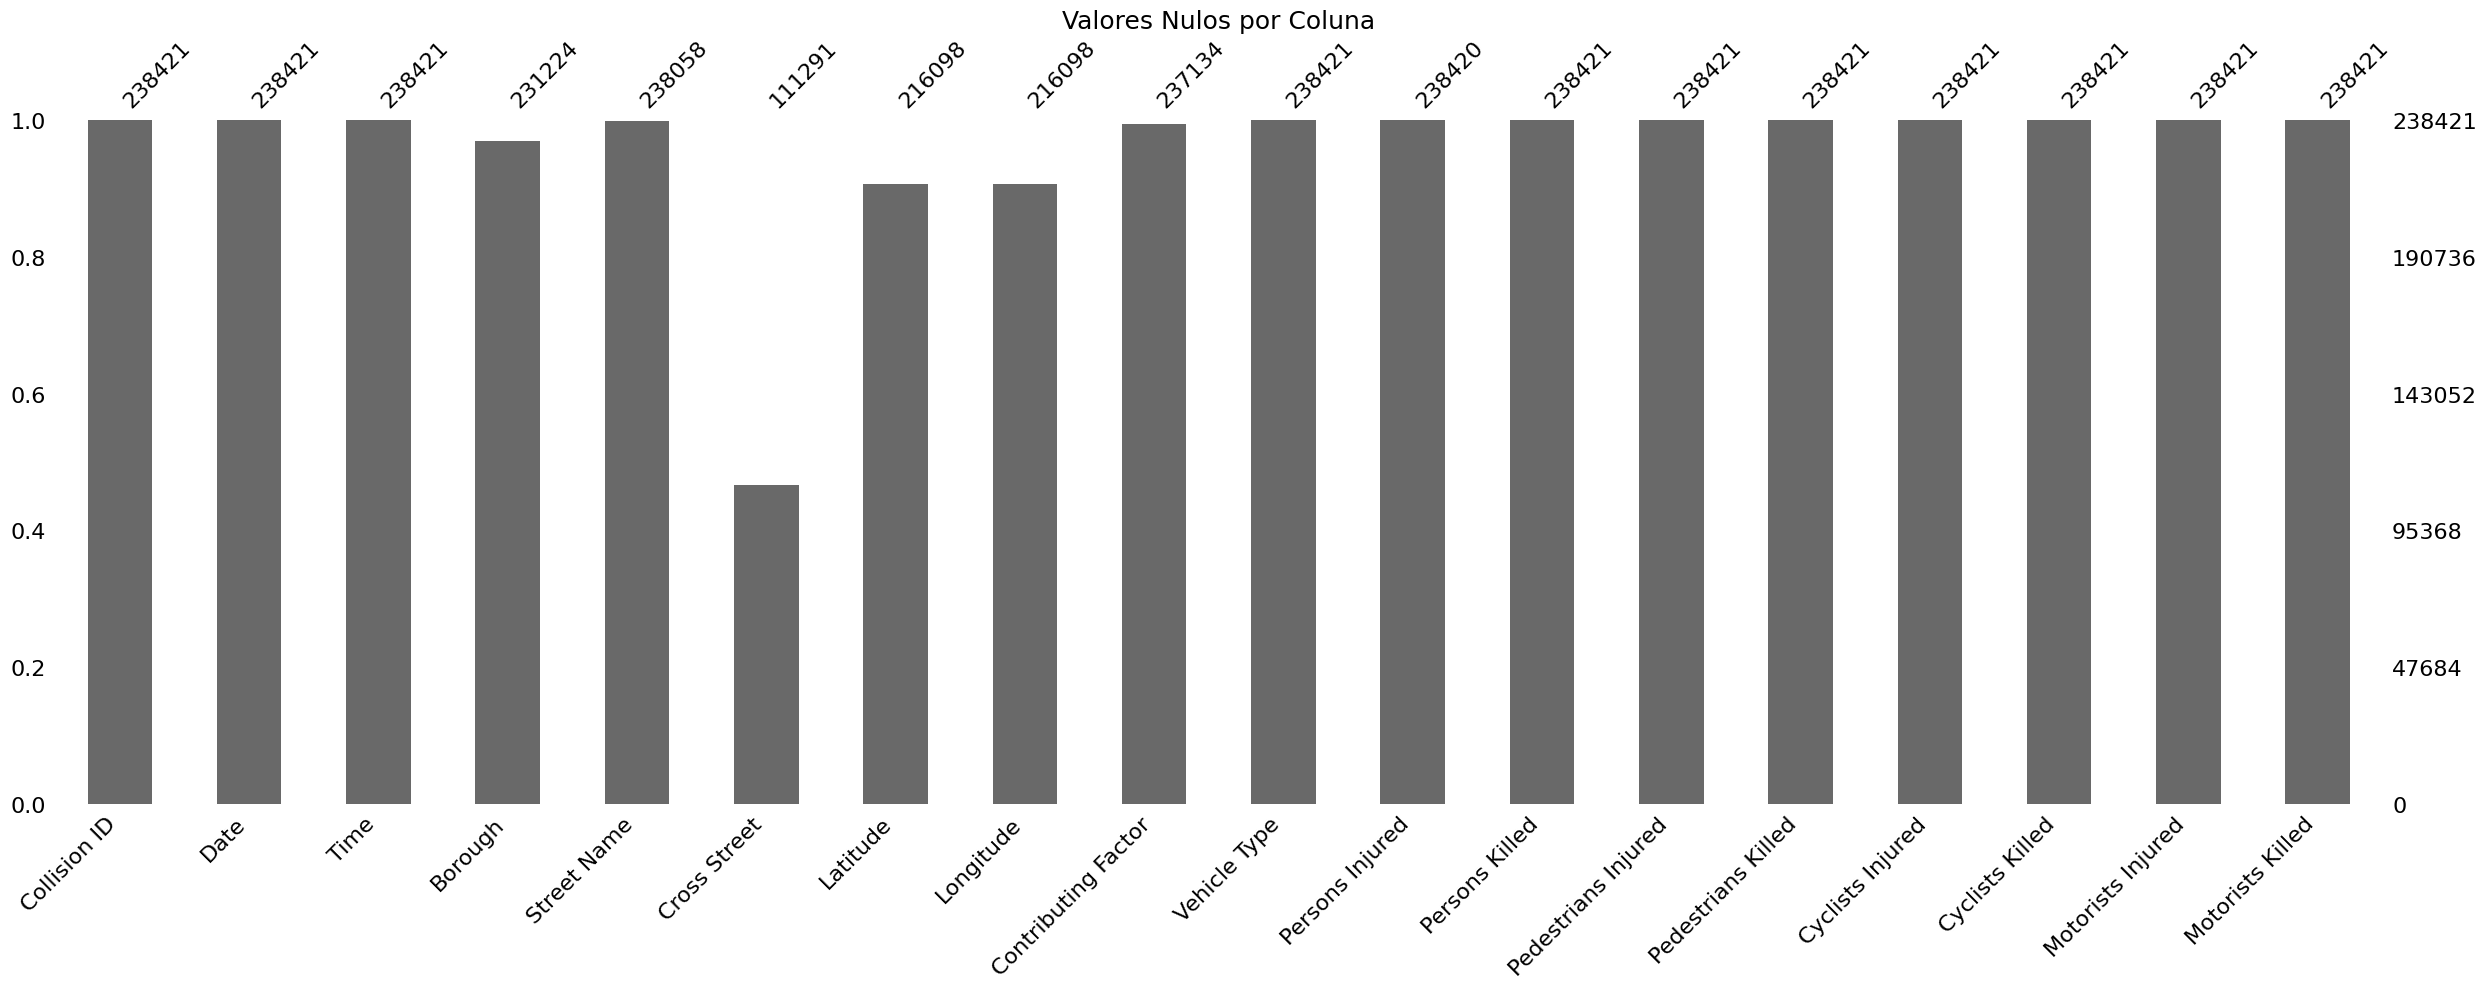

In [8]:
msno.bar(df=df)

plt.title('Valores Nulos por Coluna', fontsize=18) 
plt.tight_layout()
plt.show()


### Prática recomendada para lidar com colunas com valores nulos

Decisão sobre manter ou excluir colunas com valores nulos varia um pouco conforme o contexto do projeto e a importância da coluna.

| Percentual de Nulos | Recomendação Geral |
|---------------------|--------------------|
| < 5%                | Pode manter e preencher (ex: com "Unknown", média, zero etc.) |
| 5% – 30%            | Avaliar com cuidado. Se for uma coluna importante, preencher. Se for irrelevante, pode remover. |
| > 30% – 50%         | Tendência a descartar, a menos que a variável seja muito relevante |
| > 50%               | Normalmente descartada, a menos que seja fundamental e não possa ser obtida de outra forma |


### Cenário

#### Coluna Cross Street

- Problema:

    A coluna Cross Street apresenta 53,32% de valores nulos, ou seja, mais da metade dos registros não possui essa informação. Com um volume tão alto de dados ausentes, qualquer análise baseada nela se tornaria inconsistente e pouco confiável.

- Solução: 

    Remover a coluna Cross Street, pois sua ausência não compromete a análise. Outras variáveis de localização, como Street Name, Borough, Latitude e Longitude, são mais completas e precisas.

#### Coluna Borough

- Problema: 

    A coluna Borough tem 3,02% de valores nulos. Preencher com "Unknown" não seria adequado, pois perderíamos a capacidade de responder a perguntas sobre onde ocorrem mais acidentes.

- Viés ao usar só o nome da rua: 

    Ruas longas cruzam mais de um bairro, e sem informações como número, interseção ou CEP, a localização exata se perde, resultando em inferências erradas.

- Solução: 

    Remover registros com valores nulos de Borough, pois representam apenas 3% do total. Manter esses registros poderia prejudicar a precisão das análises de localização. As coordenadas de Latitude e Longitude são fontes mais confiáveis.

#### Coluna Contributing Factor

- Problema: 

    A coluna Contributing Factor tem 0,54% de valores nulos. Mesmo que esse número seja pequeno, esses dados são essenciais para entender o que causou os acidentes, um aspecto importante da análise.

- Solução: 

    Não remover esses registros, pois a quantidade é baixa. Em vez disso, preencher com "Unknown" para indicar que a causa do acidente não foi informada. Isso permite que os registros sejam incluídos nas análises gerais, sem enviesar os resultados de causalidade.

#### Coluna Street Name

- Problema: 

    A coluna Street Name tem 0,15% de valores nulos. Embora esse número seja pequeno, a informação é importante para entender em quais ruas os acidentes acontecem com mais frequência.

- Solução: 

    Não remover essas linhas. Como a quantidade de valores ausentes é pequena, a estratégia será filtrar essas linhas durante as análises, garantindo que as informações ainda sejam consideradas na contagem total de acidentes.

#### Coluna Person Injuried

Como tem apenas um único valor, vamos remover pois não fara diferença na nossa análise.

In [9]:
# Removendo coluna Cross Street
df = df.drop(columns=["Cross Street"])
df.head()

,Collision ID,Date,Time,Borough,Street Name,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,40.83398,-73.826350,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,40.68730,-73.973656,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,NaN,NaN,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,40.88270,-73.892730,NaN,Not Reported,0.0,0,0,0,0,0,0,0
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,40.63791,-73.978640,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0


In [10]:
# Removendo os dados nulos da coluna Borough
df = df.dropna(subset=["Borough"])
df["Borough"].isnull().sum()

np.int64(0)

In [11]:
# preenchendo coluna NaN com Unknown
df["Contributing Factor"] = df["Contributing Factor"].fillna("Unknown")

# Retornando apenas os valores Unknown através da consulta
df.query("`Contributing Factor` == 'Unknown'").head()

,Collision ID,Date,Time,Borough,Street Name,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,40.882700,-73.892730,Unknown,Not Reported,0.0,0,0,0,0,0,0,0
94,4381140,2021-01-01,17:30:00,Brooklyn,Nostrand Avenue,40.668070,-73.950676,Unknown,Passenger Vehicle,1.0,0,1,0,0,0,0,0
252,4381350,2021-01-01,22:40:00,Queens,93 Street,40.750824,-73.874090,Unknown,Not Reported,1.0,0,1,0,0,0,0,0
383,4381603,2021-01-02,16:36:00,Manhattan,East 73 Street,40.768486,-73.955505,Unknown,Not Reported,0.0,0,0,0,0,0,0,0
527,4383033,2021-01-03,11:55:00,Staten Island,Dixon Avenue,40.628480,-74.150260,Unknown,Not Reported,0.0,0,0,0,0,0,0,0


In [12]:
# preenchendo coluna NaN com Unknown
df["Street Name"] = df["Street Name"].fillna("Unknown")

# Retornando apenas os valores Unknown através da consulta
df.query("`Street Name` == 'Unknown'").head()

,Collision ID,Date,Time,Borough,Street Name,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed
288,4381007,2021-01-02,03:45:00,Brooklyn,Unknown,40.689102,-73.945070,Driver Inattention/Distraction,Passenger Vehicle,0.0,0,0,0,0,0,0,0
1045,4381772,2021-01-05,19:09:00,Queens,Unknown,40.719475,-73.792630,Driver Inattention/Distraction,Passenger Vehicle,0.0,0,0,0,0,0,0,0
1942,4384647,2021-01-09,18:10:00,Bronx,Unknown,40.821815,-73.826730,Other Electronic Device,Passenger Vehicle,0.0,0,0,0,0,0,0,0
2914,4386236,2021-01-13,15:30:00,Brooklyn,Unknown,40.677338,-73.927536,Driver Inattention/Distraction,Passenger Vehicle,0.0,0,0,0,0,0,0,0
3653,4384474,2021-01-16,20:45:00,Bronx,Unknown,40.886710,-73.815290,Unsafe Lane Changing,Passenger Vehicle,0.0,0,0,0,0,0,0,0


In [13]:
# Removendo os dados nulos da coluna Borough
df = df.dropna(subset=["Persons Injured"])
df["Persons Injured"].isnull().sum()

np.int64(0)

In [14]:
# Dataset após limpeza dos dados
df.isnull().sum()

Collision ID               0
Date                       0
Time                       0
Borough                    0
Street Name                0
Latitude               15126
Longitude              15126
Contributing Factor        0
Vehicle Type               0
Persons Injured            0
Persons Killed             0
Pedestrians Injured        0
Pedestrians Killed         0
Cyclists Injured           0
Cyclists Killed            0
Motorists Injured          0
Motorists Killed           0
dtype: int64

### Limpeza Finalizada 

Com isso, finalizamos a limpeza vamos seguir para o tratamento de conversão das colunas nosso Dataset.

### Resumo:

| Coluna              | Nulos (%) | Ação                                         |
|---------------------|-----------|----------------------------------------------------------|
| Cross Street        | 53.32%    | A coluna foi removida, pois mais da metade dos dados estavam ausentes, o que tornaria a análise inconsistente. |
| Latitude            | 9.36%     | Os nulos foram mantidos no dataset e serão filtrados apenas na visualização gráfica com o mapa de calor. |
| Longitude           | 9.36%     | Os nulos foram mantidos no dataset e serão filtrados apenas na visualização gráfica com o mapa de calor. |
| Borough             | 3.02%     | Os registros com valores nulos foram removidos, pois não foi possível inferir o bairro de forma confiável. |
| Contributing Factor | 0.54%     | Os valores nulos foram preenchidos com "Unspecified" ou "Unknown", devido à quantidade pequena de dados faltantes. |
| Street Name         | 0.15%     | Os valores nulos foram preenchidos com "Unknown", seguindo a mesma abordagem adotada para "Contributing Factor". |

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231223 entries, 0 to 238420
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Collision ID         231223 non-null  int64  
 1   Date                 231223 non-null  object 
 2   Time                 231223 non-null  object 
 3   Borough              231223 non-null  object 
 4   Street Name          231223 non-null  object 
 5   Latitude             216097 non-null  float64
 6   Longitude            216097 non-null  float64
 7   Contributing Factor  231223 non-null  object 
 8   Vehicle Type         231223 non-null  object 
 9   Persons Injured      231223 non-null  float64
 10  Persons Killed       231223 non-null  int64  
 11  Pedestrians Injured  231223 non-null  int64  
 12  Pedestrians Killed   231223 non-null  int64  
 13  Cyclists Injured     231223 non-null  int64  
 14  Cyclists Killed      231223 non-null  int64  
 15  Motorists Injured    2

#### Tratamento e criação de novas colunas derivadas

In [16]:
df["Persons Injured"] = df["Persons Injured"].astype('int64')

In [17]:
df.head()

,Collision ID,Date,Time,Borough,Street Name,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,40.83398,-73.826350,Pavement Slippery,Passenger Vehicle,0,0,0,0,0,0,0,0
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,40.68730,-73.973656,Unspecified,Passenger Vehicle,0,0,0,0,0,0,0,0
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,NaN,NaN,Fell Asleep,Passenger Vehicle,0,0,0,0,0,0,0,0
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,40.88270,-73.892730,Unknown,Not Reported,0,0,0,0,0,0,0,0
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,40.63791,-73.978640,Unspecified,Passenger Vehicle,0,0,0,0,0,0,0,0


In [18]:
# Convertendo o tipo da coluna
df["Date"] = pd.to_datetime(df["Date"])

# Criando colunas a partir da Date
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Month Name"] = df["Date"].dt.month_name()
df["Day of week"] = df["Date"].dt.day_name()
df["Day"] = df["Date"].dt.day

In [19]:
# Criando uma coluna "Season" com pd.cut para categorizar os meses em estações
df['Season'] = pd.cut(df['Month'], 
                      bins=[0, 2, 5, 8, 11, 12], 
                      labels=['Winter', 'Spring', 'Summer', 'Fall', 'Winter'],
                      ordered=False, 
                      right=True)

In [20]:
df.head()

,Collision ID,Date,Time,Borough,Street Name,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,...,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed,Year,Month,Month Name,Day of week,Day,Season
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,40.83398,-73.826350,Pavement Slippery,Passenger Vehicle,0,...,0,0,0,0,2021,1,January,Friday,1,Winter
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,40.68730,-73.973656,Unspecified,Passenger Vehicle,0,...,0,0,0,0,2021,1,January,Friday,1,Winter
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,NaN,NaN,Fell Asleep,Passenger Vehicle,0,...,0,0,0,0,2021,1,January,Friday,1,Winter
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,40.88270,-73.892730,Unknown,Not Reported,0,...,0,0,0,0,2021,1,January,Friday,1,Winter
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,40.63791,-73.978640,Unspecified,Passenger Vehicle,0,...,0,0,0,0,2021,1,January,Friday,1,Winter


In [21]:
# Filtrar registros com coordenadas fora de NYC
nyc_lat_bounds = (40.4, 41.0)  # Aproximadamente
nyc_lon_bounds = (-74.3, -73.6)  # Aproximadamente

# Verificando se existem registros fora da área de NYC
df_outside_nyc = df[
    (df['Latitude'] < nyc_lat_bounds[0]) | 
    (df['Latitude'] > nyc_lat_bounds[1]) | 
    (df['Longitude'] < nyc_lon_bounds[0]) | 
    (df['Longitude'] > nyc_lon_bounds[1])
]

# Exibir os registros fora da área de NYC
df_outside_nyc


,Collision ID,Date,Time,Borough,Street Name,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,...,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed,Year,Month,Month Name,Day of week,Day,Season


### Tratamento Finalizado

Fizemos toda a limpeza e tratamento dos dados nesta primeira etapa.

- Processed:

    Salvando os dados tratados e limpos.

In [22]:
df.to_csv("../data/processed/NYC_Collisions_Processed.csv", index=False)